---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5)

1

In [3]:
np.random.binomial(1000, 0.5)/1000

0.491

In [4]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

21

In [5]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

113 tornadoes back to back in 2739.72602739726 years


In [6]:
np.random.uniform(0, 1)

0.8676375038877849

In [7]:
np.random.normal(0.75)

1.5777246948505619

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [8]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0075464436862491

In [9]:
np.std(distribution)

1.0075464436862491

In [10]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.15575813313359133

In [11]:
stats.skew(distribution)

-0.02650293022774075

In [12]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9949535354509405

In [13]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2909449380361324

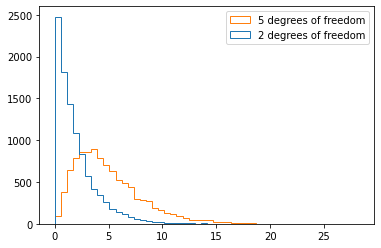

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [15]:
import pandas as pd
df = pd.read_csv('grades.csv')

In [16]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [17]:
len(df)

2315

In [18]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [19]:
early

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000
5,D09000A0-827B-C0FF-3433-BF8FF286E15B,71.647278,2015-12-28 04:35:32.836000000,64.052550,2016-01-03 21:05:38.392000000,64.752550,2016-01-07 08:55:43.692000000,57.467295,2016-01-11 00:45:28.706000000,57.467295,2016-01-11 00:54:13.579000000,57.467295,2016-01-20 19:54:46.166000000
8,C9D51293-BD58-F113-4167-A7C0BAFCB6E5,66.595568,2015-12-25 02:29:28.415000000,52.916454,2015-12-31 01:42:30.046000000,48.344809,2016-01-05 23:34:02.180000000,47.444809,2016-01-02 07:48:42.517000000,37.955847,2016-01-03 21:27:04.266000000,37.955847,2016-01-19 15:24:31.060000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,EFDA9F93-D0C3-864F-B0F6-2E9AA3E05E31,71.481182,2015-10-03 09:04:46.358000000,70.981182,2015-10-06 03:57:28.420000000,64.603064,2015-10-12 07:58:25.081000000,63.703064,2015-10-17 07:59:49.005000000,50.962451,2015-10-18 02:29:34.374000000,45.866206,2015-10-27 00:21:47.208000000
2309,6D2AB78F-44F4-2E8B-5C5E-B79119BC7EAC,82.640274,2015-10-01 23:25:20.529000000,65.752219,2015-10-05 02:06:11.522000000,53.341775,2015-10-22 23:58:36.426000000,47.197598,2015-10-16 12:32:56.809000000,47.197598,2015-10-24 12:16:54.993000000,37.758078,2015-10-26 10:34:41.293000000
2311,DE88902E-C7A7-E37A-CFA7-F2C8F2D219F2,75.367870,2015-11-29 02:43:27.932000000,59.934296,2015-12-03 05:30:39.218000000,48.687437,2015-12-09 15:56:44.895000000,43.008693,2015-12-13 06:18:01.342000000,38.707824,2015-12-20 02:39:39.248000000,38.707824,2015-12-22 13:34:42.931000000
2312,EFDA9F93-D0C3-864F-B0F6-2E9AA3E05E31,73.269463,2015-10-20 08:09:27.418000000,58.255570,2015-11-18 19:07:06.930000000,58.955570,2015-12-10 08:54:54.871000000,52.250013,2015-11-23 19:40:00.434000000,41.800010,2015-11-29 14:23:43.659000000,41.800010,2015-12-04 09:56:07.156000000


In [20]:
late.mean()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [21]:
from scipy import stats
stats.ttest_ind?

Signature: stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
    population variance [2]_.

    .. versionadded:: 0.11.0
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle whe

In [22]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [23]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.323986822091257, pvalue=0.18563824610067958)

In [24]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)